In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adaptive_al_v2.utils.data_loader import *
from collections import Counter
from itertools import chain
from wordcloud import WordCloud, STOPWORDS

sns.set_theme(style="whitegrid")

# Helper Functions

In [3]:
def load_data(dataset_name):
    """
    Load dataset using data_loader.py and return combined training and validation sets.

    :param dataset_name: Name of the dataset to load (e.g., 'agnews', 'imdb', 'jigsaw').
    """
    _, (df_train, df_val, df_test) = eval(f"load_{dataset_name}()")
    print(f"Train size: {df_train.shape}")
    print(f"Validation size: {df_val.shape}")
    print(f"Test size: {df_test.shape}")
    df = pd.concat([df_train, df_val])
    print(f"The labels are: {sorted(df["label"].unique().tolist())}")
    return df


def plot_label_distribution(df, label_col="label", label_map=None, title="Label Distribution"):
    """
    Plot the distribution of labels in the dataset.

    :param df: DataFrame containing the data.
    :param label_col: Column name for labels.
    :param label_map: Optional dictionary mapping label values to names.
    :param title: Title of the plot.
    """
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=label_col, palette="Set2")
    if label_map:
        plt.xticks(ticks=range(len(label_map)), labels=label_map.values())
    plt.title(title)
    plt.ylabel("Samples")
    plt.xlabel("Class")
    plt.show()


def plot_text_length_distribution(df, text_col="text", label_col="label", label_map=None, cutoff=1000, jump=25,
                                  title="Text Length Distribution"):
    """
    Plot the distribution of text lengths and a boxplot of text lengths by class.

    :param df: DataFrame containing the data.
    :param text_col: Column name for text data.
    :param label_col: Column name for labels.
    :param label_map: Optional dictionary mapping label values to names.
    :param cutoff: Maximum text length to display in histogram.
    :param jump: Bin width for histogram.
    :param title: Title of the plots.
    """
    df["text_length"] = df[text_col].apply(lambda x: len(str(x).split()))

    plt.figure(figsize=(6, 4))
    sns.histplot(df[df["text_length"] < cutoff]['text_length'], bins=range(0, cutoff + 1, jump), kde=True)
    plt.title(title)
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.show()

    ax = sns.boxplot(x=label_col, y="text_length", data=df, palette="Set2")
    if label_map:
        ax.set_xticklabels(label_map.values())
    plt.title(f"{title} by {label_col.capitalize()}")
    plt.show()

def print_example_texts(df, label_col, label_map, num_examples=1):
    """
    Print example texts from each class.

    :param df: DataFrame containing the data.
    :param label_col: Column name for labels.
    :param label_map: Dictionary mapping label values to names.
    :param num_examples: Number of examples to print per class.
    """
    for label_id, label_name in label_map.items():
        print(f"\nExample from class: {label_name}")
        samples = df[df[label_col] == label_id].sample(num_examples)
        for i, sample in samples.iterrows():
            print(f"- {sample['text'][:500]}...")  # Print first 500 characters


def print_unique_word_count(df):
    """
    Print the count of unique words in the dataset.

    :param df: DataFrame containing the data.
    """
    tokenized = df["text"].apply(lambda x: str(x).lower().split())
    vocab = Counter(chain.from_iterable(tokenized))
    print(f"Unique words in training set: {len(vocab)}")


def print_frequent_words(df, label_col, label_map, top_n=10):
    """
    Print the most frequent words per class.

    :param df: DataFrame containing the data.
    :param label_col: Column name for labels.
    :param label_map: Dictionary mapping label values to names.
    :param top_n: Number of top words to print per class.
    """
    for label_id, label_name in label_map.items():
        subset = df[df[label_col] == label_id]
        text_blob = " ".join(subset["text"].astype(str)).lower()
        words = text_blob.split()
        word_freq = Counter(words)
        most_common = word_freq.most_common(top_n)
        print(f"\nTop {top_n} words in class '{label_name}':")
        for word, freq in most_common:
            print(f"{word}: {freq}")


def plot_word_clouds(df, label_col, label_map, words_to_ignore=None):
    """
    Plot word clouds for each class in the dataset.

    :param df: DataFrame containing the data.
    :param label_col: Column name for labels.
    :param label_map: Dictionary mapping label values to names.
    :param words_to_ignore: List of additional words to ignore in the word cloud.
    """
    stopwords = set(STOPWORDS)
    if words_to_ignore:
        stopwords = stopwords.union(set(words_to_ignore))
    for label_id, label_name in label_map.items():
        subset = df[df[label_col] == label_id]
        text_blob = " ".join(subset["text"].astype(str)).lower()

        wordcloud = WordCloud(width=800, height=400, background_color='white',
                              stopwords=stopwords, max_words=100, collocations=False).generate(text_blob)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Top Words in Class: {label_name}", fontsize=16)
        plt.show()

# AG News

## Load Dataset

In [4]:
ag_news_train_val = load_data("agnews")

Train size: (108000, 2)
Validation size: (12000, 2)
Test size: (7600, 2)
The labels are: [0, 1, 2, 3]


In [5]:
ag_news_train_val.head()

,text,label
0,10 seconds that change everything. ATHENS - Te...,1
1,Charline Labonte rises to challenge. Charline ...,1
2,Ex-El Paso Traders Plead Guilty to False Repor...,2
3,Brit deal #39;one year only. Even if British ...,1
4,"Signed, Sealed, Delivered. CHICAGO - The Cubs ...",1


## Class Balance

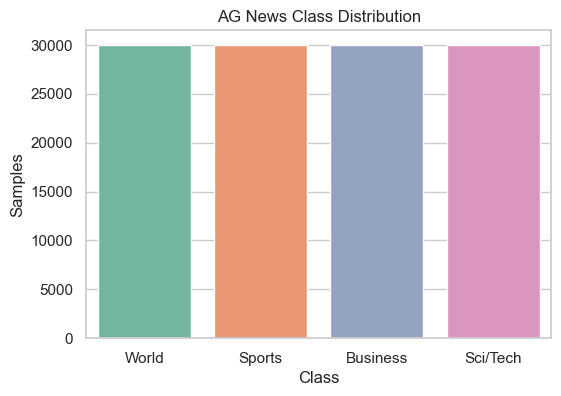

In [6]:
ag_news_label_map = {
    0: "World",
    1: "Sports",
    2: "Business",
    3: "Sci/Tech"
}

# Plotting a barplot of the label distribution
plot_label_distribution(ag_news_train_val, "label", ag_news_label_map, "AG News Class Distribution")

## Text Length Distribution

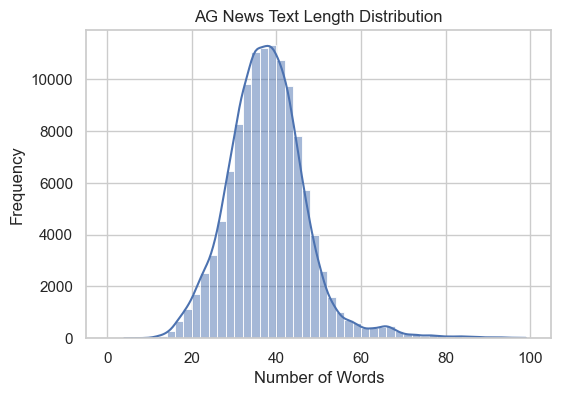

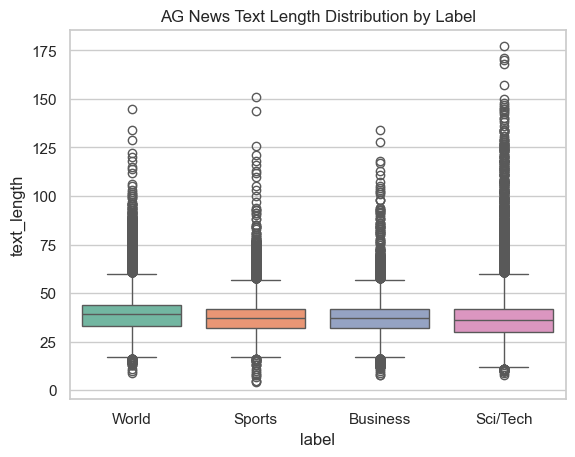

In [7]:
plot_text_length_distribution(ag_news_train_val, "text", "label", ag_news_label_map, 100, 2,
                              "AG News Text Length Distribution")

In [8]:
print_example_texts(ag_news_train_val, "label", ag_news_label_map, 1)


Example from class: World
- Gaza plan wins party vote. Israel #39;s plan to pull out of Gaza next year passed a crucial test on Thursday when Prime Minister Ariel Sharon easily won party approval to ask the more moderate Labor party to join his coalition....

Example from class: Sports
- When team hits road, Ortiz will take field. Even though David Ortiz has started only two games at first base in the last three months, he will play the position when the Red Sox face the St. Louis Cardinals at Busch Stadium in Games 3, 4, and 5 (if necessary) of the World Series. The way the Sox see it, they have no choice but to go with ......

Example from class: Business
- Philippine shares down Friday. Philippine shares finished lower Friday for the fourth straight session, led by losses in blue chip Philippine Long Distance Telephone Co....

Example from class: Sci/Tech
- Browsers become business bugbear. commentary The debate between Microsoft #39;s Internet Explorer and Mozilla Firefox has inte

## Unique Word Count

In [9]:
print_unique_word_count(ag_news_train_val)

Unique words in training set: 164438


## Most Frequent Words Per Class

In [10]:
print_frequent_words(ag_news_train_val, "label", ag_news_label_map, 10)


Top 10 words in class 'World':
the: 48544
in: 31943
to: 30757
a: 30375
of: 28813
and: 17445
on: 15871
-: 13513
for: 11450
that: 6708

Top 10 words in class 'Sports':
the: 63129
to: 27373
a: 25738
in: 23834
of: 20225
and: 15645
for: 13773
on: 12144
#39;s: 9482
at: 9302

Top 10 words in class 'Business':
the: 44299
to: 29713
a: 24956
of: 22627
in: 22031
and: 16939
on: 16372
for: 12051
its: 9487
-: 9006

Top 10 words in class 'Sci/Tech':
the: 47251
to: 31065
a: 26198
of: 26181
and: 18587
in: 17366
for: 12790
on: 11795
that: 9205
-: 7853


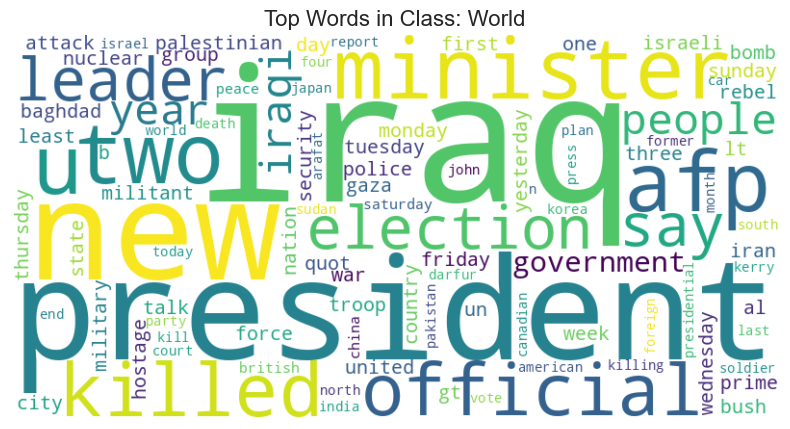

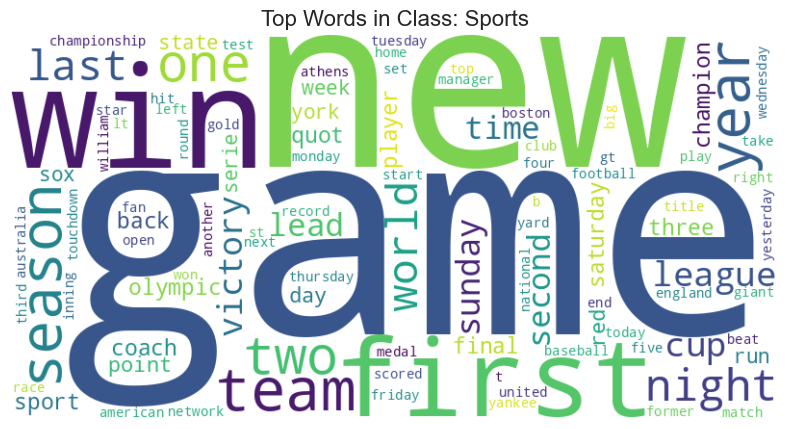

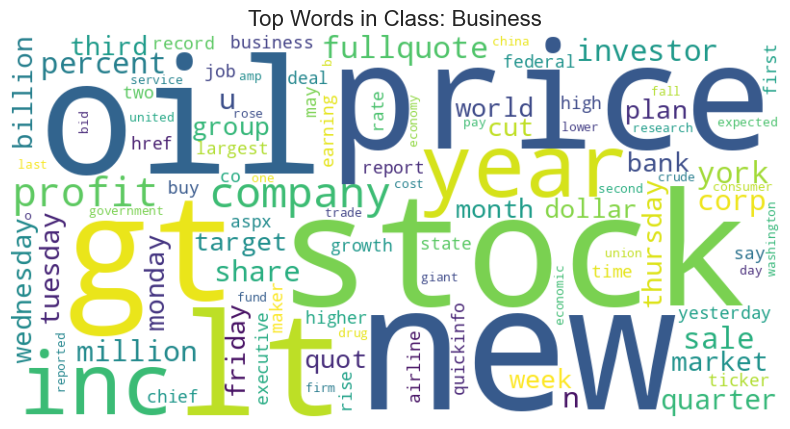

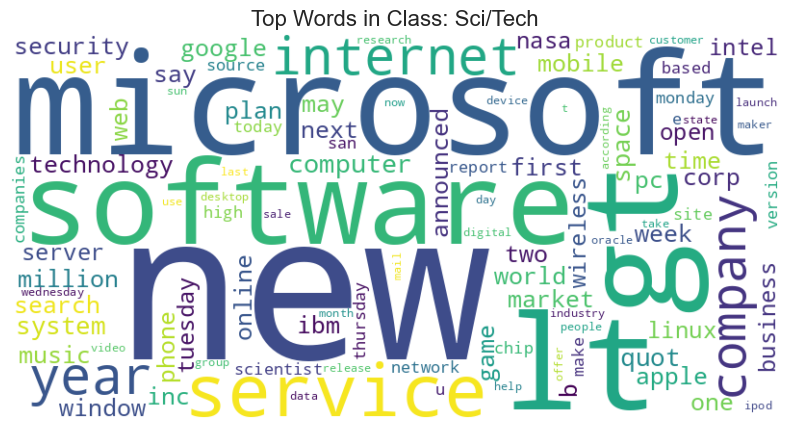

In [11]:
plot_word_clouds(ag_news_train_val, "label", ag_news_label_map,
                 words_to_ignore=["said", "will", "us", "reuters", "s", "ap"])

# IMDb

## Load Dataset

In [12]:
imdb_train_val = load_data("imdb")

Train size: (35000, 2)
Validation size: (5000, 2)
Test size: (10000, 2)
The labels are: [0, 1]


In [13]:
imdb_train_val.head()

,text,label
0,He really lost the plot with this one! None of...,0
1,I loved this movie when I was a teenager. LOVE...,0
2,This film almost gave me a nervous breakdown. ...,0
3,This movie was supposedly based on a non-ficti...,0
4,What a fascinating film. Even if it wasn't bas...,1


## Class Balance

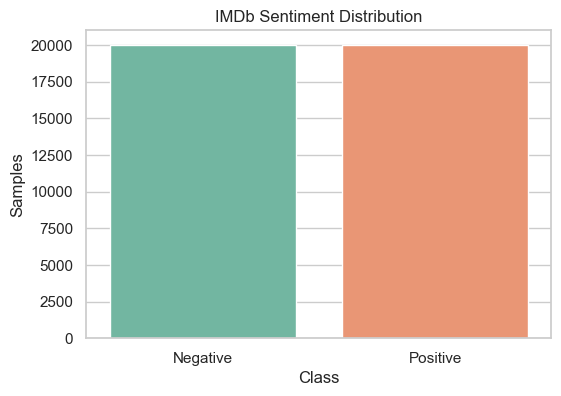

In [14]:
imdb_label_map = {0: "Negative", 1: "Positive"}
plot_label_distribution(imdb_train_val, "label", imdb_label_map, "IMDb Sentiment Distribution")

## Text Length Distribution

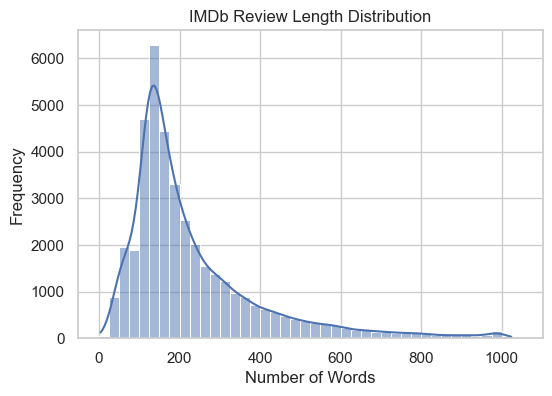

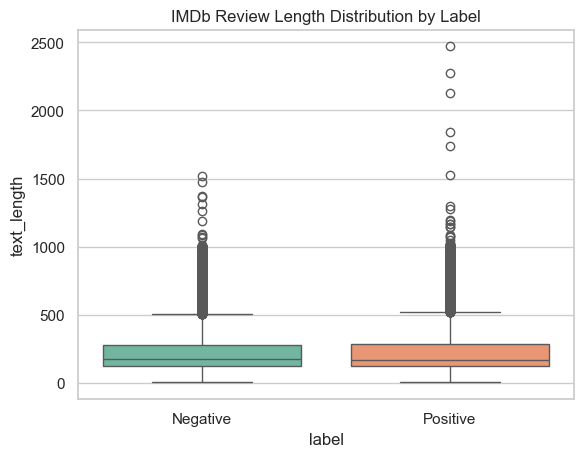

In [15]:
plot_text_length_distribution(imdb_train_val, "text", "label", imdb_label_map, 1050, 25,
                              "IMDb Review Length Distribution")

In [16]:
print_example_texts(imdb_train_val, "label", imdb_label_map, 1)


Example from class: Negative
- then the second half of this movie is hard to follow. I got the first part with the Spanish Inquistion, but the film skipped many years forward with the French ruling Spain. The movie does little to fill you in on what happened, and I don't remember much about it. So, the movie gets confusing then. The movie begins when Ines, daughter of a rich merchant, is accused of Judiasm by the church, specifically Father Lorenzo. She is put to the Question and forced to confess. Even her family's wealth ca...

Example from class: Positive
- Cinderella is one of Disney's greatest films, one of those films I think you appreciate more the older you get. Disney creates a magical adaptation of the classic fairytale. I consider the film to have been the greatest of his films at the time of its release. The characters became more dimensional than earlier films, creating more depth to appreciate the characters more. Cinderella herself is, in my opinion, one of the greatest

## Unique Word Count

In [17]:
print_unique_word_count(imdb_train_val)

Unique words in training set: 339686


## Word Clouds

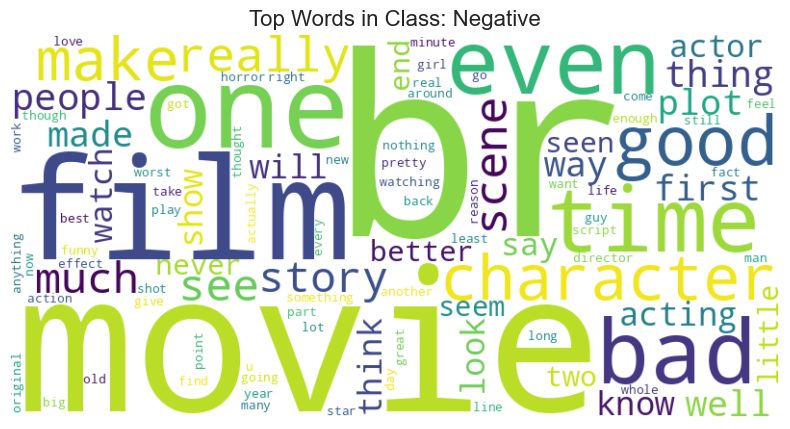

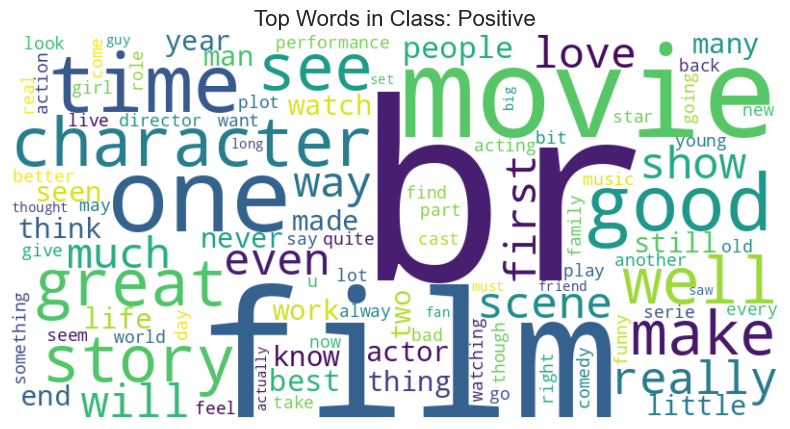

In [18]:
plot_word_clouds(imdb_train_val, "label", imdb_label_map)

# Jigsaw

## Load Dataset

In [19]:
jigsaw_train_val = load_data("jigsaw")

Train size: (111699, 2)
Validation size: (15957, 2)
Test size: (31915, 2)
The labels are: [0, 1]


In [20]:
jigsaw_train_val.head()

,text,label
0,The feather will land first!! (and please don'...,0
1,"I'm not sure I'm making my point clear, so I'l...",0
2,"""\r\n Did Mario Bros Air on Fox Kids? \r\nI kn...",0
3,Thankyou... it appears that someone else rever...,0
4,"felt happy to create it,",0


## Class Balance

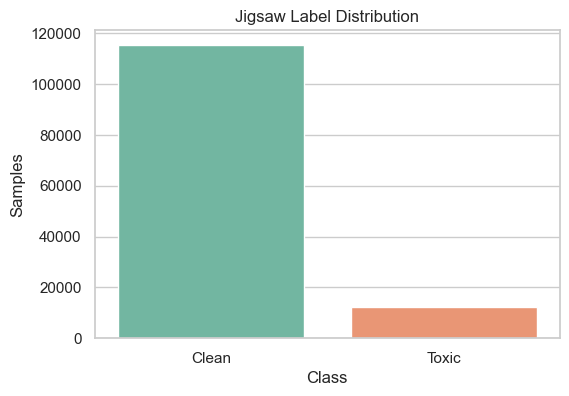

In [21]:
jigsaw_label_map = {0: "Clean", 1: "Toxic"}
plot_label_distribution(jigsaw_train_val, "label", jigsaw_label_map, "Jigsaw Label Distribution")

## Text Length Distribution

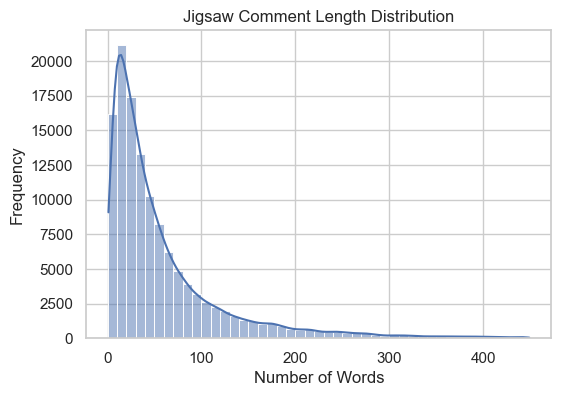

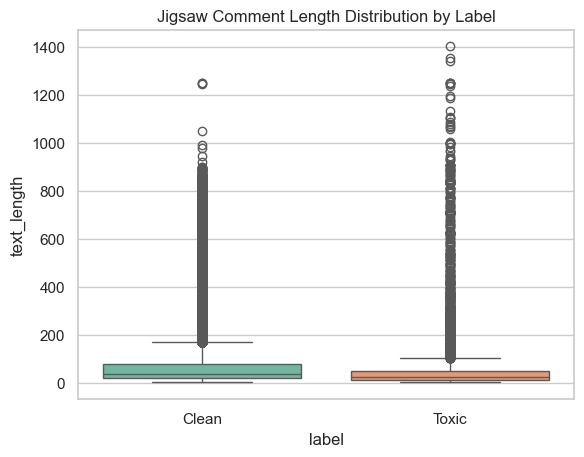

In [22]:
plot_text_length_distribution(jigsaw_train_val, "text", "label", jigsaw_label_map, 450, 10,
                              "Jigsaw Comment Length Distribution")

In [23]:
print_example_texts(jigsaw_train_val, "label", jigsaw_label_map, 1)


Example from class: Clean
- "

WikiProject Scouting elections
You are receiving this notice as an active member of WikiProject Scouting. To change your status as a member, please edit Wikipedia:WikiProject Scouting/Members.

 is retiring as our lead coordinator; see Stepping down as ScoutingWikiProject Lead Coordinator. Election for a new coordinator will be held after the new year. If you are interested in nominating yourself or another editor, please add the name to Project coordinator election.

Yours in Scouting...

Example from class: Toxic
- east hanning feild is gay...


## Unique Word Count

In [24]:
print_unique_word_count(jigsaw_train_val)

Unique words in training set: 403345


## Word Clouds

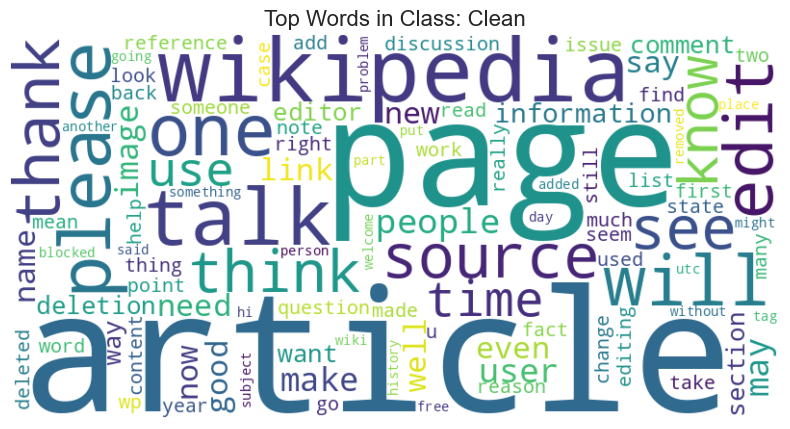

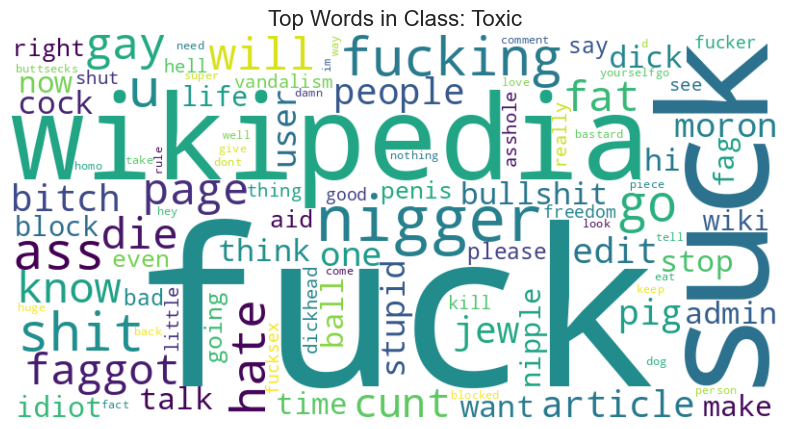

In [25]:
plot_word_clouds(jigsaw_train_val, "label", jigsaw_label_map)